In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import patsy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours, TomekLinks
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kidney_disease.csv")

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df_copy = df.dropna()

In [ ]:
df_copy.shape

(158, 26)

In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.drop(['rbc','pc','sod','pot','pcv','wc','rc'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   pcc             396 non-null    object 
 7   ba              396 non-null    object 
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  hemo            348 non-null    float64
 12  htn             398 non-null    object 
 13  dm              398 non-null    object 
 14  cad             398 non-null    object 
 15  appet           399 non-null    object 
 16  pe              399 non-null    object 
 17  ane             399 non-null    obj

In [ ]:
df_v1 = df

In [ ]:
df_v1.replace(np.nan, 0, inplace=True)

In [ ]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pcc             400 non-null    object 
 7   ba              400 non-null    object 
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  hemo            400 non-null    float64
 12  htn             400 non-null    object 
 13  dm              400 non-null    object 
 14  cad             400 non-null    object 
 15  appet           400 non-null    object 
 16  pe              400 non-null    object 
 17  ane             400 non-null    obj

In [ ]:
df_v1['pcc'].value_counts()

notpresent    354
present        42
0               4
Name: pcc, dtype: int64

In [ ]:
df_v1['pcc'].replace(0, 'present', inplace=True)

In [ ]:
df_v1['pcc'].value_counts()

notpresent    354
present        46
Name: pcc, dtype: int64

In [ ]:
df_v1['ba'].value_counts()

notpresent    374
present        22
0               4
Name: ba, dtype: int64

In [ ]:
df_v1['ba'].replace(0, 'present', inplace=True)

In [ ]:
df_v1['ba'].value_counts()

notpresent    374
present        26
Name: ba, dtype: int64

In [ ]:
df_v1['htn'].value_counts()

no     251
yes    147
0        2
Name: htn, dtype: int64

In [ ]:
df_v1['htn'].replace(0, 'yes', inplace=True)

In [ ]:
df_v1['htn'].value_counts()

no     251
yes    149
Name: htn, dtype: int64

In [ ]:
df_v1['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
0          2
 yes       1
Name: dm, dtype: int64

In [ ]:
df_v1['dm'].replace(0, 'yes', inplace=True)

In [ ]:
df_v1['dm'].value_counts()

no       258
yes      136
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [ ]:
df_v1['cad'].value_counts()

no      362
yes      34
\tno      2
0         2
Name: cad, dtype: int64

In [ ]:
df_v1['cad'].replace(0, 'yes', inplace=True)

In [ ]:
df_v1['cad'].value_counts()

no      362
yes      36
\tno      2
Name: cad, dtype: int64

In [ ]:
df_v1['appet'].value_counts()

good    317
poor     82
0         1
Name: appet, dtype: int64

In [ ]:
df_v1['appet'].replace(0, 'poor', inplace=True)

In [ ]:
df_v1['appet'].value_counts()

good    317
poor     83
Name: appet, dtype: int64

In [ ]:
df_v1['pe'].value_counts()

no     323
yes     76
0        1
Name: pe, dtype: int64

In [ ]:
df_v1['pe'].replace(0, 'yes', inplace=True)

In [ ]:
df_v1['pe'].value_counts()

no     323
yes     77
Name: pe, dtype: int64

In [ ]:
df_v1['ane'].value_counts()

no     339
yes     60
0        1
Name: ane, dtype: int64

In [ ]:
df_v1['ane'].replace(0, 'yes', inplace=True)

In [ ]:
df_v1['ane'].value_counts()

no     339
yes     61
Name: ane, dtype: int64

In [ ]:
df_v1['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
df_v1 = pd.get_dummies(data=df_v1, drop_first=True)

In [ ]:
df_v1.drop('classification_notckd', axis=1, inplace=True)

In [ ]:
df_v1 ['classification'] = df['classification']

In [ ]:
df_v1.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'hemo',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_\tyes', 'dm_ yes', 'dm_no',
       'dm_yes', 'cad_no', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes',
       'classification_ckd\t', 'classification'],
      dtype='object')

In [ ]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   400 non-null    int64  
 1   age                  400 non-null    float64
 2   bp                   400 non-null    float64
 3   sg                   400 non-null    float64
 4   al                   400 non-null    float64
 5   su                   400 non-null    float64
 6   bgr                  400 non-null    float64
 7   bu                   400 non-null    float64
 8   sc                   400 non-null    float64
 9   hemo                 400 non-null    float64
 10  pcc_present          400 non-null    uint8  
 11  ba_present           400 non-null    uint8  
 12  htn_yes              400 non-null    uint8  
 13  dm_	yes              400 non-null    uint8  
 14  dm_ yes              400 non-null    uint8  
 15  dm_no                400 non-null    uin

In [ ]:
v1col_list = list(df_v1.columns)

In [ ]:
v1_features = []

In [ ]:
[v1_features.append(col) for col in v1col_list if col != 'class']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
v1_features

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'hemo',
 'pcc_present',
 'ba_present',
 'htn_yes',
 'dm_\tyes',
 'dm_ yes',
 'dm_no',
 'dm_yes',
 'cad_no',
 'cad_yes',
 'appet_poor',
 'pe_yes',
 'ane_yes',
 'classification_ckd\t',
 'classification']

In [ ]:
df_v1['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
df_notckd = df[df['classification']== 'notckd']
df_ckd = df[df['classification'] != 'notckd']

df_ckd['classification'] = 0
df_notckd['classification'] = 1
df_v1 = pd.concat([df_notckd,df_ckd])
df_v1

<ipython-input-51-f6e3c39e397f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ckd['classification'] = 0
<ipython-input-51-f6e3c39e397f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notckd['classification'] = 1


,id,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
250,250,40.0,80.0,1.025,0.0,0.0,notpresent,notpresent,140.0,10.0,1.2,15.0,no,no,no,good,no,no,1
251,251,23.0,80.0,1.025,0.0,0.0,notpresent,notpresent,70.0,36.0,1.0,17.0,no,no,no,good,no,no,1
252,252,45.0,80.0,1.025,0.0,0.0,notpresent,notpresent,82.0,49.0,0.6,15.9,no,no,no,good,no,no,1
253,253,57.0,80.0,1.025,0.0,0.0,notpresent,notpresent,119.0,17.0,1.2,15.4,no,no,no,good,no,no,1
254,254,51.0,60.0,1.025,0.0,0.0,notpresent,notpresent,99.0,38.0,0.8,13.0,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,48.0,100.0,0.000,0.0,0.0,notpresent,notpresent,103.0,79.0,5.3,6.3,yes,no,yes,poor,no,no,0
246,246,48.0,110.0,1.015,3.0,0.0,present,notpresent,106.0,215.0,15.2,8.6,yes,no,yes,good,no,yes,0
247,247,54.0,90.0,1.025,1.0,0.0,notpresent,notpresent,150.0,18.0,1.2,0.0,no,no,no,poor,yes,yes,0
248,248,59.0,70.0,1.010,1.0,3.0,notpresent,notpresent,424.0,55.0,1.7,12.6,yes,yes,yes,good,no,no,0


In [ ]:
df_v1['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
X = df_v1.drop(columns=['classification'])
y = df_v1['classification']
X.shape,y.shape

((400, 18), (400,))

In [ ]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 250 to 249
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pcc             400 non-null    object 
 7   ba              400 non-null    object 
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  hemo            400 non-null    float64
 12  htn             400 non-null    object 
 13  dm              400 non-null    object 
 14  cad             400 non-null    object 
 15  appet           400 non-null    object 
 16  pe              400 non-null    object 
 17  ane             400 non-null    o

In [ ]:
X_ = pd.get_dummies(X,drop_first=True)
X_

,id,age,bp,sg,al,su,bgr,bu,sc,hemo,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
250,250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,1.2,15.0,...,0,0,0,1,0,1,0,0,0,0
251,251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,1.0,17.0,...,0,0,0,1,0,1,0,0,0,0
252,252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,0.6,15.9,...,0,0,0,1,0,1,0,0,0,0
253,253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,1.2,15.4,...,0,0,0,1,0,1,0,0,0,0
254,254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,0.8,13.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,48.0,100.0,0.000,0.0,0.0,103.0,79.0,5.3,6.3,...,1,0,0,1,0,0,1,1,0,0
246,246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,15.2,8.6,...,1,0,0,1,0,0,1,0,0,1
247,247,54.0,90.0,1.025,1.0,0.0,150.0,18.0,1.2,0.0,...,0,0,0,1,0,1,0,1,1,1
248,248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,1.7,12.6,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y,test_size=0.25, random_state = 42)

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_train)

StandardScaler()

In [ ]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
logreg.score(X_train_sc, y_train)

0.9933333333333333

In [ ]:
logreg.score(X_test_sc, y_test)

0.98

In [ ]:
logreg.coef_

array([[ 3.54457241e+00,  8.51835386e-02, -3.60766014e-01,
         5.15386831e-01, -1.30103439e+00, -5.07795222e-01,
         1.29446143e-01,  2.26391069e-01, -2.86646288e-01,
         6.71240705e-01, -7.59624611e-02,  7.32579444e-02,
        -8.87713494e-01, -1.38442932e-02,  0.00000000e+00,
         4.69345767e-01, -4.30923771e-01, -2.30881829e-01,
         2.96620442e-01, -3.46616094e-01, -3.50678398e-01,
         1.49797384e-03]])

In [ ]:
np.exp(0.11018577)

1.1164854606988666

In [ ]:
predictions = logreg.predict(X_test_sc)

In [ ]:
cm = confusion_matrix(y_test, predictions)

<Axes: >

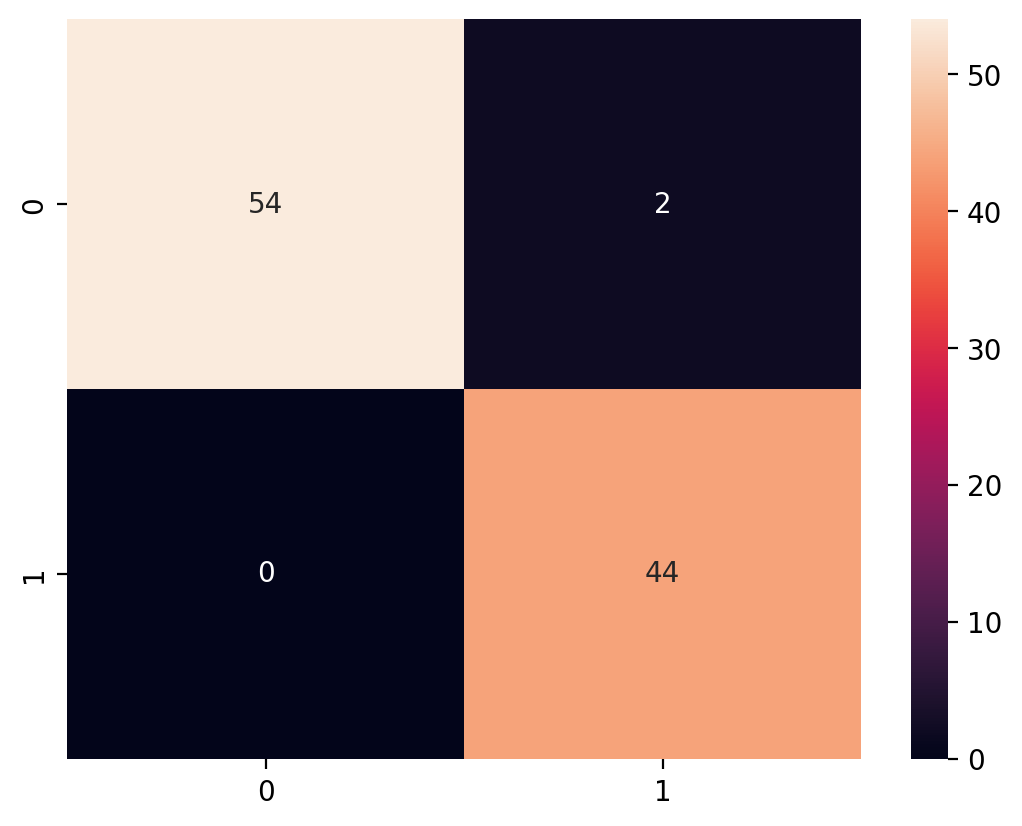

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot= True)

In [ ]:
cm = pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])

In [ ]:
cm

,Predicted Negative,Predicted Positive
Actual Negative,54,2
Actual Positive,0,44
